This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

# ABOUT THE DATA

- Brand: Name of the car manufacturer
- Year: Year of manufacture or release
- Model: Name or code of the car model
- Car/Suv: Type of the car (car or suv)
- Title: Title or description of the car
- UsedOrNew: Condition of the car (used or new)
- Transmission: Type of transmission (manual or automatic)
- Engine: Engine capacity or power (in litres or kilowatts)
- DriveType: Type of drive (front-wheel, rear-wheel, or all-wheel)
- FuelType: Type of fuel (petrol, diesel, hybrid, or electric)
- FuelConsumption: Fuel consumption rate (in litres per 100 km)
- Kilometres: Distance travelled by the car (in kilometres)
- ColourExtInt: Colour of the car (exterior and interior)
- Location: Location of the car (city and state)
- CylindersinEngine: Number of cylinders in the engine
- BodyType: Shape or style of the car body (sedan, hatchback, coupe, etc.)
- Doors: Number of doors in the car
- Seats: Number of seats in the car
- Price: Price of the car (in Australian dollars)

# **`Importing Relevant Libraries`**

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [165]:
# reading the csv file
df = pd.read_csv('Australian Vehicle Prices.csv')

In [166]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

We see that our data has only one column 'Year' that has data type float, while all the other columns have data type object. \
There are some irrelevant columns that we pose a problem to us if we keep them in the dataset, so we are dropping them.

In [168]:
df = df.drop(['Title','ColourExtInt','Model','Car/Suv'],axis=1)

Converting values of the columns 'FuelConsumption', 'Location', 'Engine', 'CylindersinEngine', 'Doors' and 'Seats', so that they can be operable.

In [169]:
df['FuelConsumption']=df['FuelConsumption'].str.split('/').str[0].str.split().str[0]
df['Location']=df['Location'].str.split(',').str[1].str.strip()
df['Engine'] = df['Engine'].str.split(',').str[1].str.split().str[0]
df['CylindersinEngine'] = df['CylindersinEngine'].str.split().str[0]
df['Doors']= df['Doors'].str.split().str[0]
df['Seats'] = df['Seats'].str.split().str[0]

Replacing '-' and 'POA' with null values. 

In [170]:
df.replace(['-','POA'],np.NAN,inplace=True)

Checking for the missing values

In [171]:
df.isnull().sum()

Brand                   1
Year                    1
UsedOrNew               1
Transmission          252
Engine               1783
DriveType               1
FuelType              638
FuelConsumption      1698
Kilometres            143
Location              450
CylindersinEngine    1675
BodyType              282
Doors                1604
Seats                1705
Price                  53
dtype: int64

Checking for the percentage of data missing from each column.

In [172]:
print("Percentage of data missing from each column")
df.isnull().sum()/len(df)*100

Percentage of data missing from each column


Brand                 0.005976
Year                  0.005976
UsedOrNew             0.005976
Transmission          1.505916
Engine               10.654954
DriveType             0.005976
FuelType              3.812597
FuelConsumption      10.147006
Kilometres            0.854548
Location              2.689136
CylindersinEngine    10.009561
BodyType              1.685192
Doors                 9.585275
Seats                10.188837
Price                 0.316720
dtype: float64

# **`Data Preprocessing`**

Engine, FuelConsumption, CylindersinEngine, Doors, Seats have more than 5% data missing, so we cannot drop them since it will lose a lot of information from the data. However we drop the null values from any other column.

In [173]:
df.dropna(subset=['Location','BodyType','Price','Transmission','FuelType','Kilometres'], inplace=True)

For the columns Engine, FuelConsumption, CylindersinEngine, Doors, and Seats, we fill the missing values with the mode obtained from the given data of each column.

In [174]:
df['Engine'].fillna(df[~df['Engine'].isnull()]['Engine'].str.strip().astype(float).mode()[0],inplace=True)
df['FuelConsumption'].fillna(df[~df['FuelConsumption'].isnull()]['FuelConsumption'].str.strip().astype(float).mode()[0],inplace=True)
df['CylindersinEngine'].fillna(df[~df['CylindersinEngine'].isnull()]['CylindersinEngine'].str.strip().astype(int).mode()[0],inplace=True)
df['Doors'].fillna(df[~df['Doors'].isnull()]['Doors'].str.strip().astype(int).mode()[0],inplace=True)
df['Seats'].fillna(df[~df['Seats'].isnull()]['Seats'].str.strip().astype(int).mode()[0],inplace=True)

Now we convert the data types of the columns - Engine, FuelConsumption, Kilometres, CylindersinEngine, Doors, Seats and Prices into integer or float  as per needed.

In [175]:
df['Engine'] = df['Engine'].astype(float)
df['FuelConsumption'] = df['FuelConsumption'].astype(float)
df['Kilometres'] = df['Kilometres'].astype(float)
df['CylindersinEngine']=df['CylindersinEngine'].astype(int)
df['Doors'] = df['Doors'].astype(int)
df['Seats'] = df['Seats'].astype(int)
df['Price'] = df['Price'].astype(float)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15306 entries, 0 to 16733
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              15306 non-null  object 
 1   Year               15306 non-null  float64
 2   UsedOrNew          15306 non-null  object 
 3   Transmission       15306 non-null  object 
 4   Engine             15306 non-null  float64
 5   DriveType          15306 non-null  object 
 6   FuelType           15306 non-null  object 
 7   FuelConsumption    15306 non-null  float64
 8   Kilometres         15306 non-null  float64
 9   Location           15306 non-null  object 
 10  CylindersinEngine  15306 non-null  int32  
 11  BodyType           15306 non-null  object 
 12  Doors              15306 non-null  int32  
 13  Seats              15306 non-null  int32  
 14  Price              15306 non-null  float64
dtypes: float64(5), int32(3), object(7)
memory usage: 1.7+ MB


In [177]:
df.head()

,Brand,Year,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,DEMO,Automatic,2.2,AWD,Diesel,8.7,5595.0,NSW,4,SUV,4,7,51990.0
1,MG,2022.0,USED,Automatic,1.5,Front,Premium,6.7,16.0,NSW,4,Hatchback,5,5,19990.0
2,BMW,2022.0,USED,Automatic,2.0,Rear,Premium,6.6,8472.0,NSW,4,Coupe,2,4,108988.0
3,Mercedes-Benz,2011.0,USED,Automatic,5.5,Rear,Premium,11.0,136517.0,NSW,8,Coupe,2,4,32990.0
4,Renault,2022.0,USED,Automatic,1.3,Front,Unleaded,6.0,1035.0,NSW,4,SUV,4,5,34990.0


We notice that our data is consistent without any missing value, so we will use this data for the EDA.

# **`Summary Statistics`**

In [178]:
df[['Engine','FuelConsumption','Kilometres','Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
Engine,15306.0,2.386019,0.843115,0.7,2.00,2.0,2.80,7.3
FuelConsumption,15306.0,7.723429,2.139530,0.0,6.70,7.5,8.70,27.0
Kilometres,15306.0,101290.290017,78140.256535,1.0,42852.25,86690.5,147681.75,533849.0
Price,15306.0,35071.470273,31858.822964,88.0,18950.00,28950.0,41999.00,1500000.0


- The average engine capacity of a vehicle is 2.386 Litres with a standard deviation of 0.84 Litres.
- On an average 7.7 litres per 100 km of fuel is consumed by a vehicle.
- On an average 101290.29 km is covered by a vehicle. The standard deviation is high, which can seen from the fact that the range is quite large from 1-533849 km.
- On an average a vehicle cost 35071.47 Australian Dollars. The standard deviation is high, which can seen from the fact that the range is quite large from 88-1500000 Australian Dollars.

# **`Exploratory Data Analysis`**

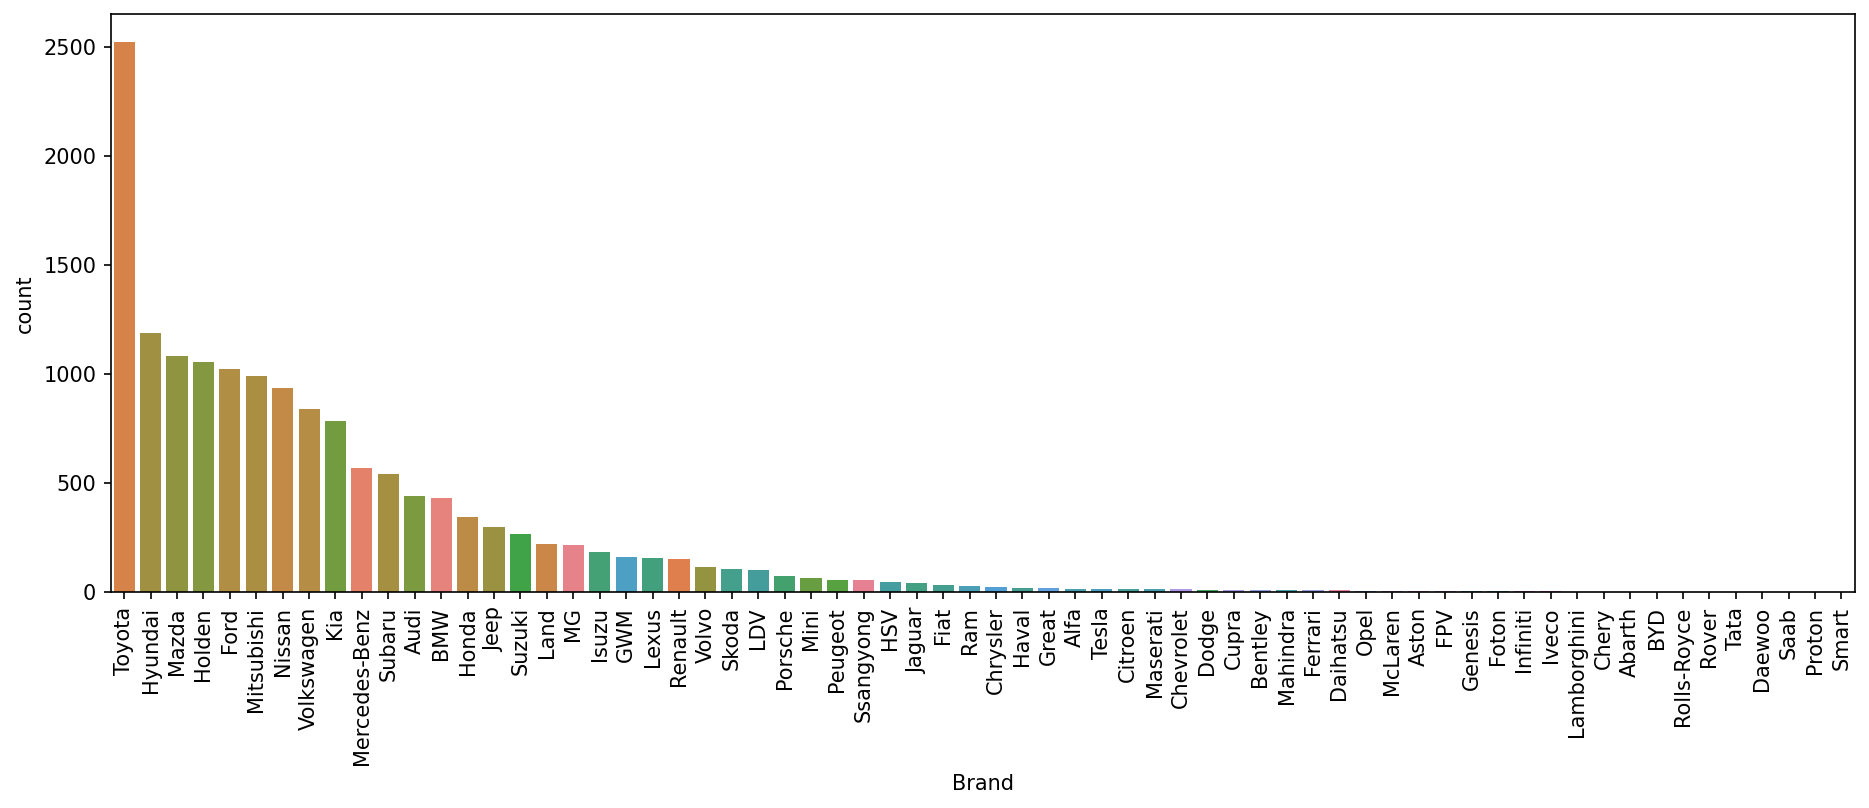

In [179]:
plt.figure(figsize=(15,5),dpi=150)
sns.countplot(data=df, x='Brand',hue='Brand',order=df['Brand'].value_counts().index)
plt.xticks(rotation=90);

The above countplot shows that the brand which had the highest sales in the Australian market in the year 2023 is Toyota, followed bt Hyundai, Mazda, Holden and Ford. The brand of the vehicle having the least sales is Smart.

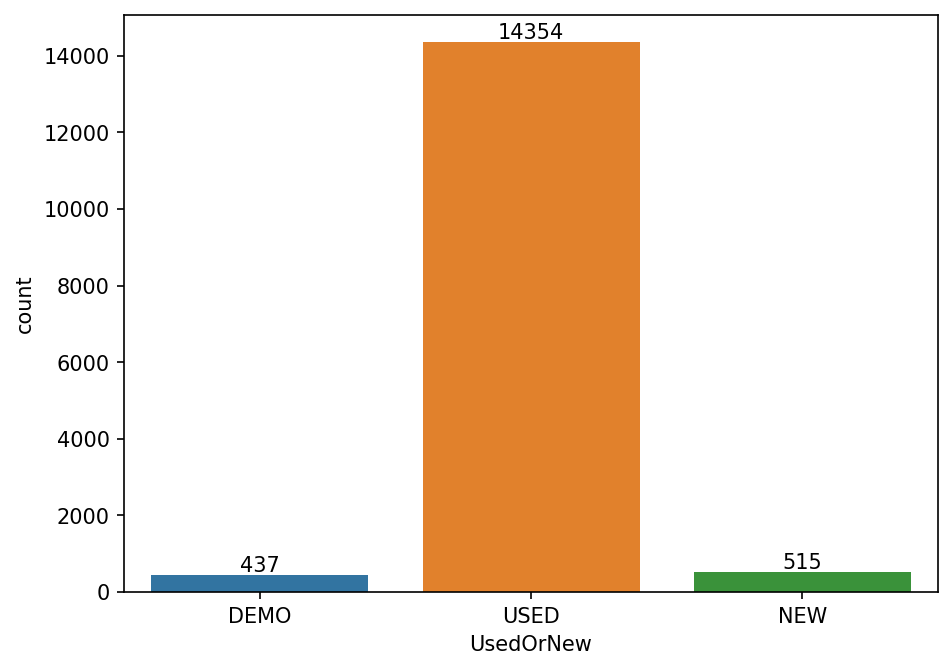

In [180]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='UsedOrNew', hue='UsedOrNew')
for i in ax.containers:
    ax.bar_label(i,)

Of the 15306 cars that we are using in our study, 14354 of them are used cars while 437 of the are demo cars and only 515 are new.

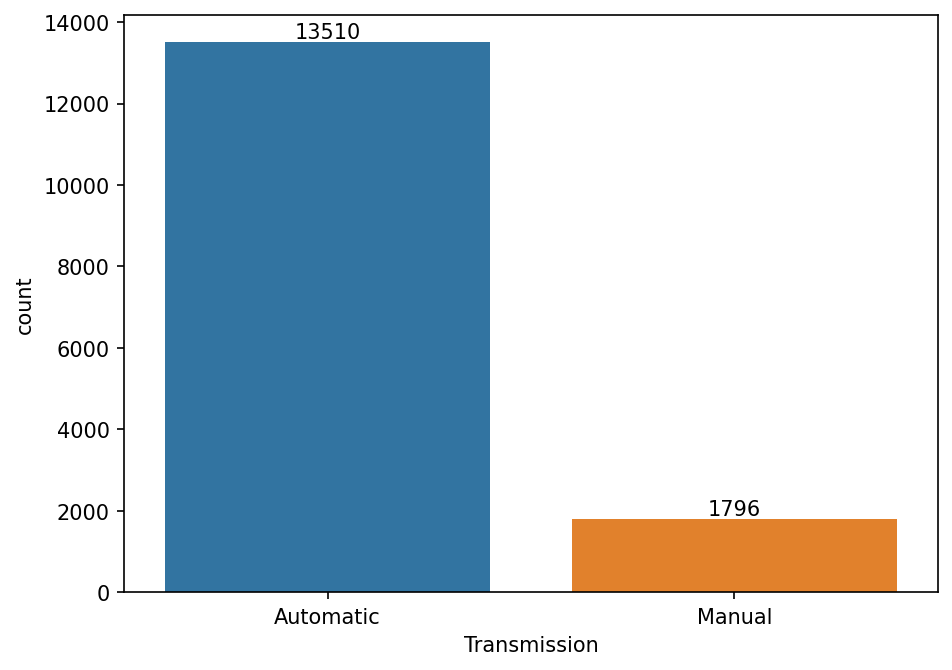

In [181]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='Transmission',hue='Transmission')
for i in ax.containers:
    ax.bar_label(i,)

13510 cars that are sold in the market were automatic and 1796 cars were manual.

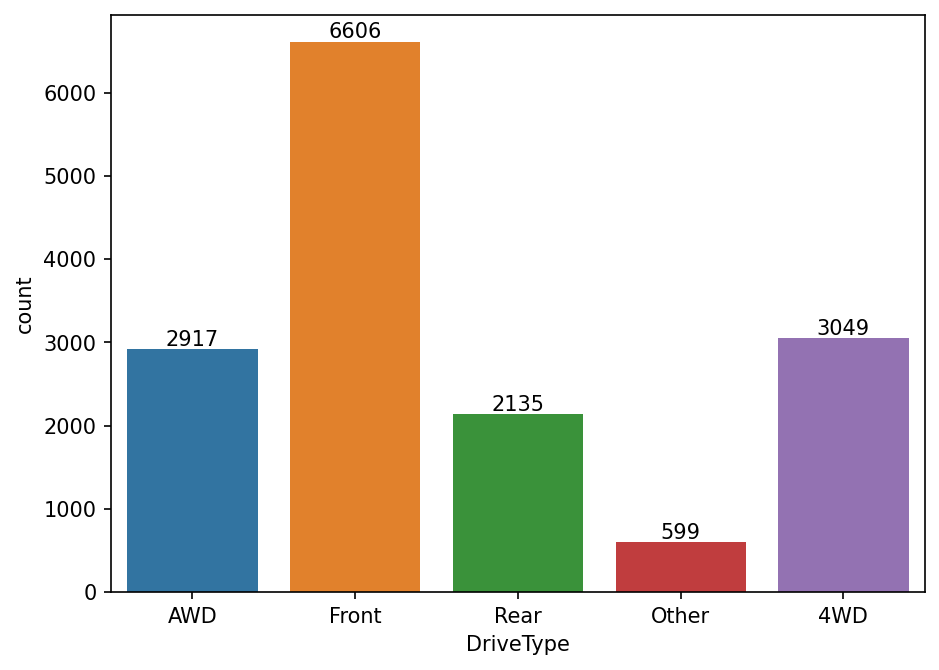

In [182]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='DriveType',hue='DriveType')
for i in ax.containers:
    ax.bar_label(i,)

The above countplot shows the distribution of cars according to the type of drive. The numbers for Front wheel is high.

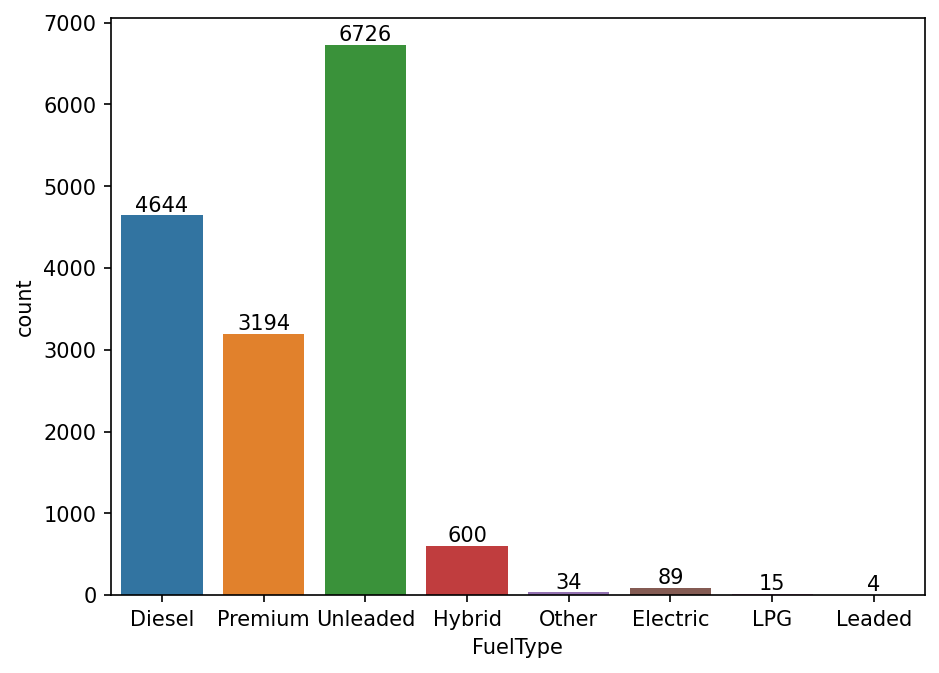

In [183]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='FuelType',hue='FuelType')
for i in ax.containers:
    ax.bar_label(i,)

A high number of cars used unleaded fuel.

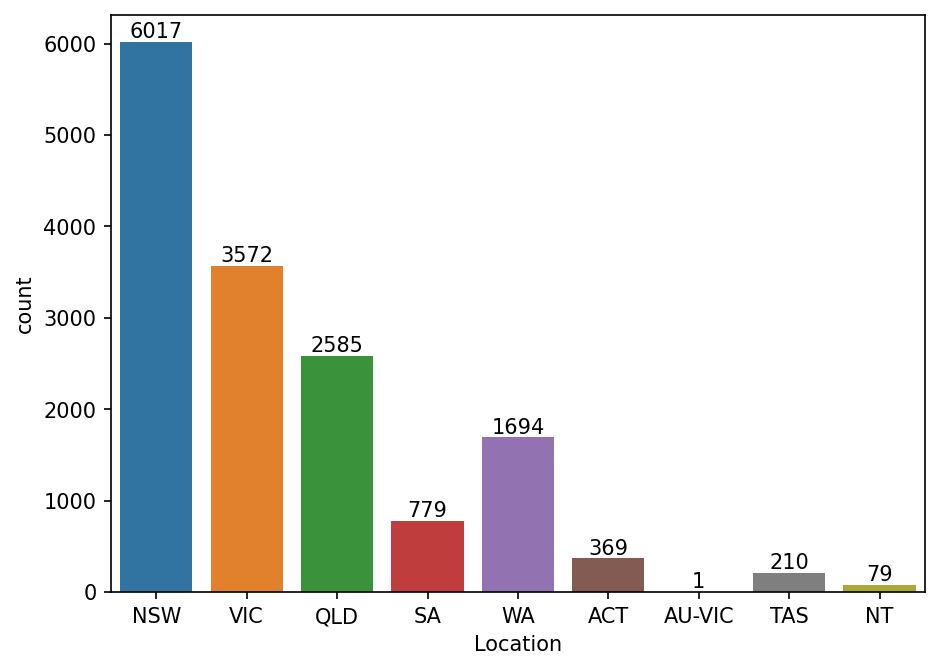

In [184]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='Location', hue='Location')
for i in ax.containers:
    ax.bar_label(i,)

New South Wales had the highest number of sales of cars.

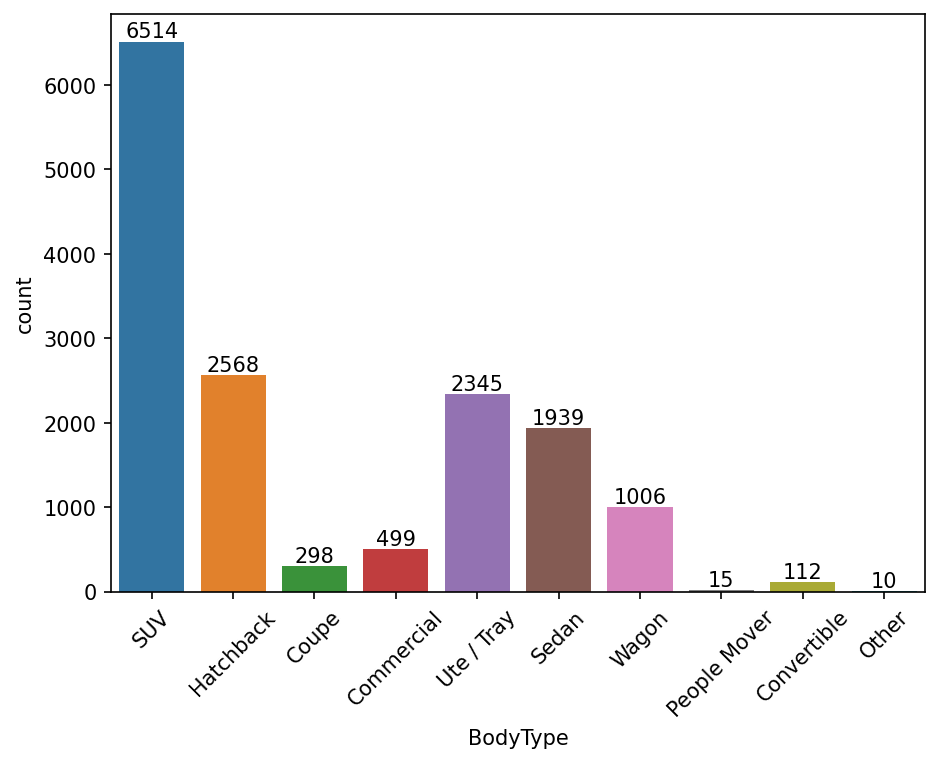

In [185]:
plt.figure(figsize=(7,5),dpi=150)
ax = sns.countplot(data=df, x='BodyType',hue='BodyType')
for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation=45);

<Axes: xlabel='Kilometres', ylabel='Price'>

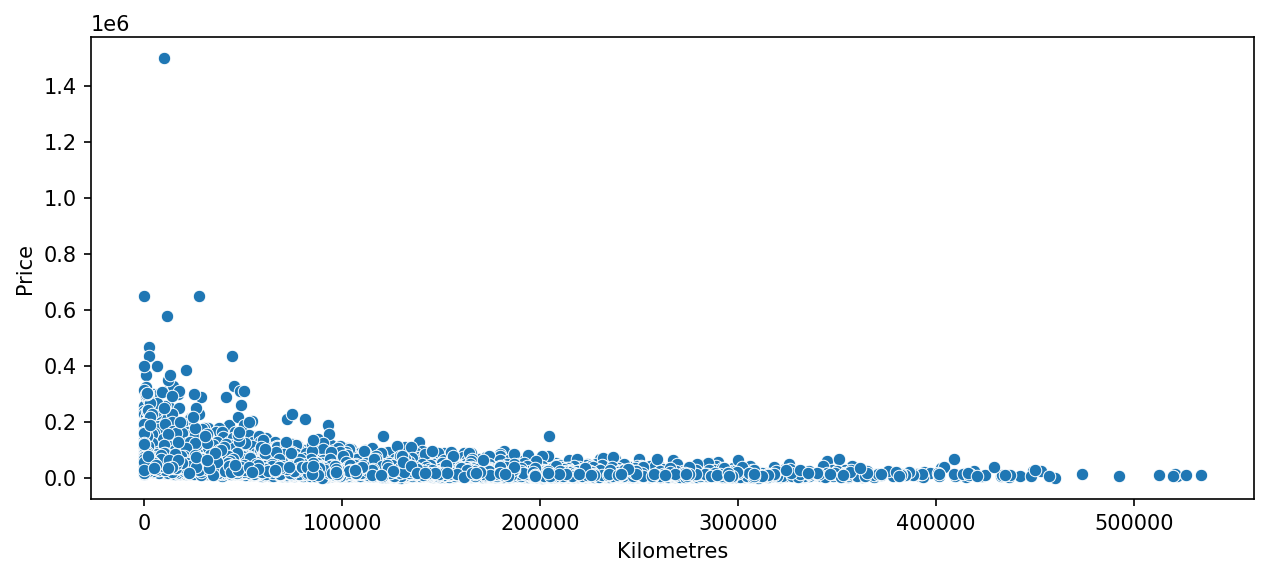

In [186]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='Kilometres',y='Price')

**`Insights from the above scatterplot`** 
- Most of the clusters are seen at the left bottom of the figure which signifies that a car with low price will cover short distances. 
- Outliers can be seen. There is a car which has a very high price but covers less than 10 km. Also, there are several cars which have low prices but covers large distances.

<Axes: xlabel='Year', ylabel='Price'>

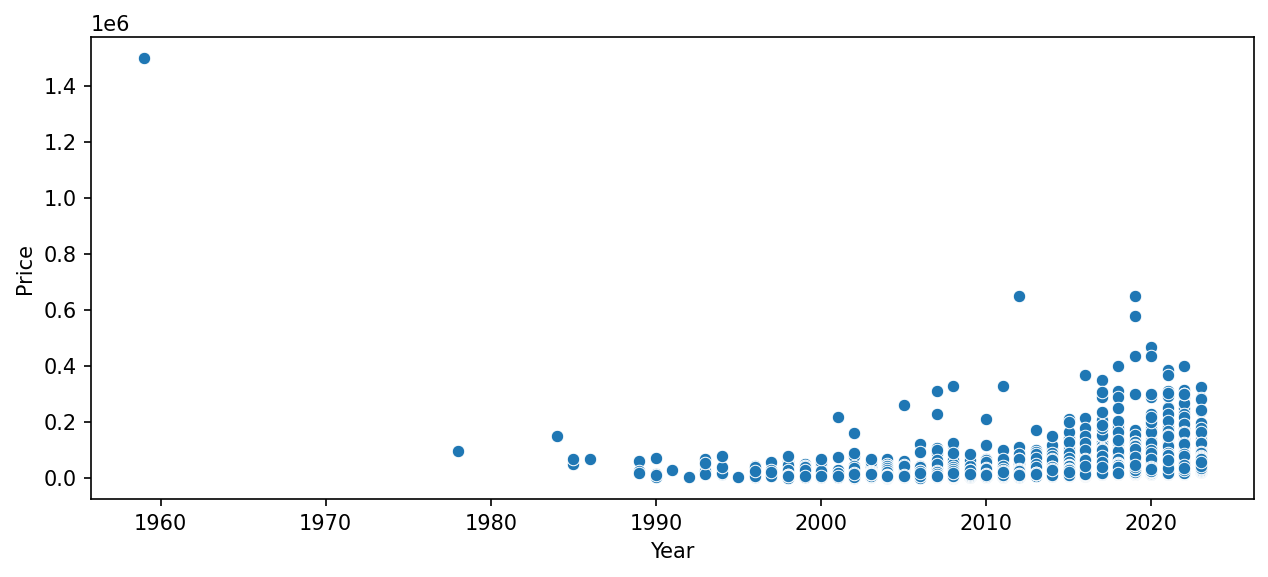

In [187]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='Year',y='Price')

**`Insights from the above scatterplot`** 
- Most of the clusters are seen at the right bottom of the figure which signifies that a car has low price and is manufactured or released after 2000. 
- There is a car which has a very high price but was manufactured or released before 1960. 

<Axes: xlabel='FuelConsumption', ylabel='Price'>

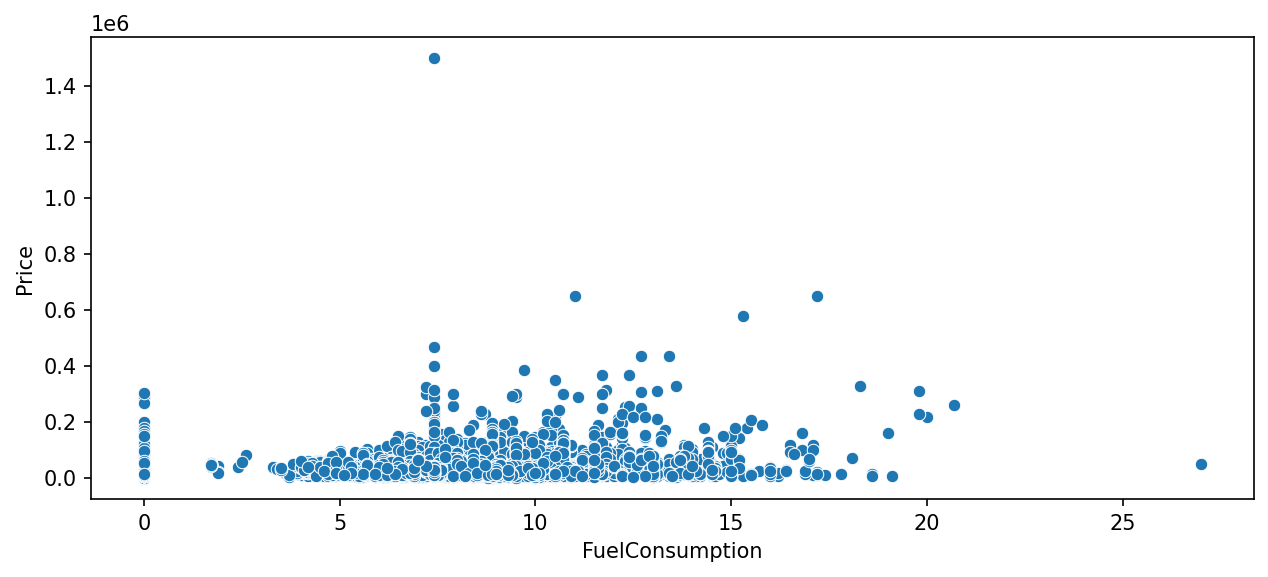

In [188]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='FuelConsumption',y='Price')

**`Insights from the above scatterplot`** 
- Most of the clusters are seen at the bottom of the figure which signifies that a car has low price and consumes around 5-15 litres per of fuel 100 km. 
- There are several cars that have consumed no fuel at all.
- There is a car which has a very high price but has consumed less than 10 litres (per 100 km) of fuel. 

In [189]:
df[df['Year']<1960]

,Brand,Year,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price
15313,Ferrari,1959.0,USED,Manual,2.0,Rear,Unleaded,7.4,9902.0,NSW,4,Coupe,4,5,1500000.0


We found out that the car which is considerably the outlier in all previous cases is an Used Ferrari which is at sale in New South Wales and costs 1500000 Australian Dollars. This is may be due to the fact that it is vintage and on high demand.

Let us remove this outlier in order to have a better look at all the other cases.

In [190]:
df=df.drop(15313)

<Axes: xlabel='Location', ylabel='Price'>

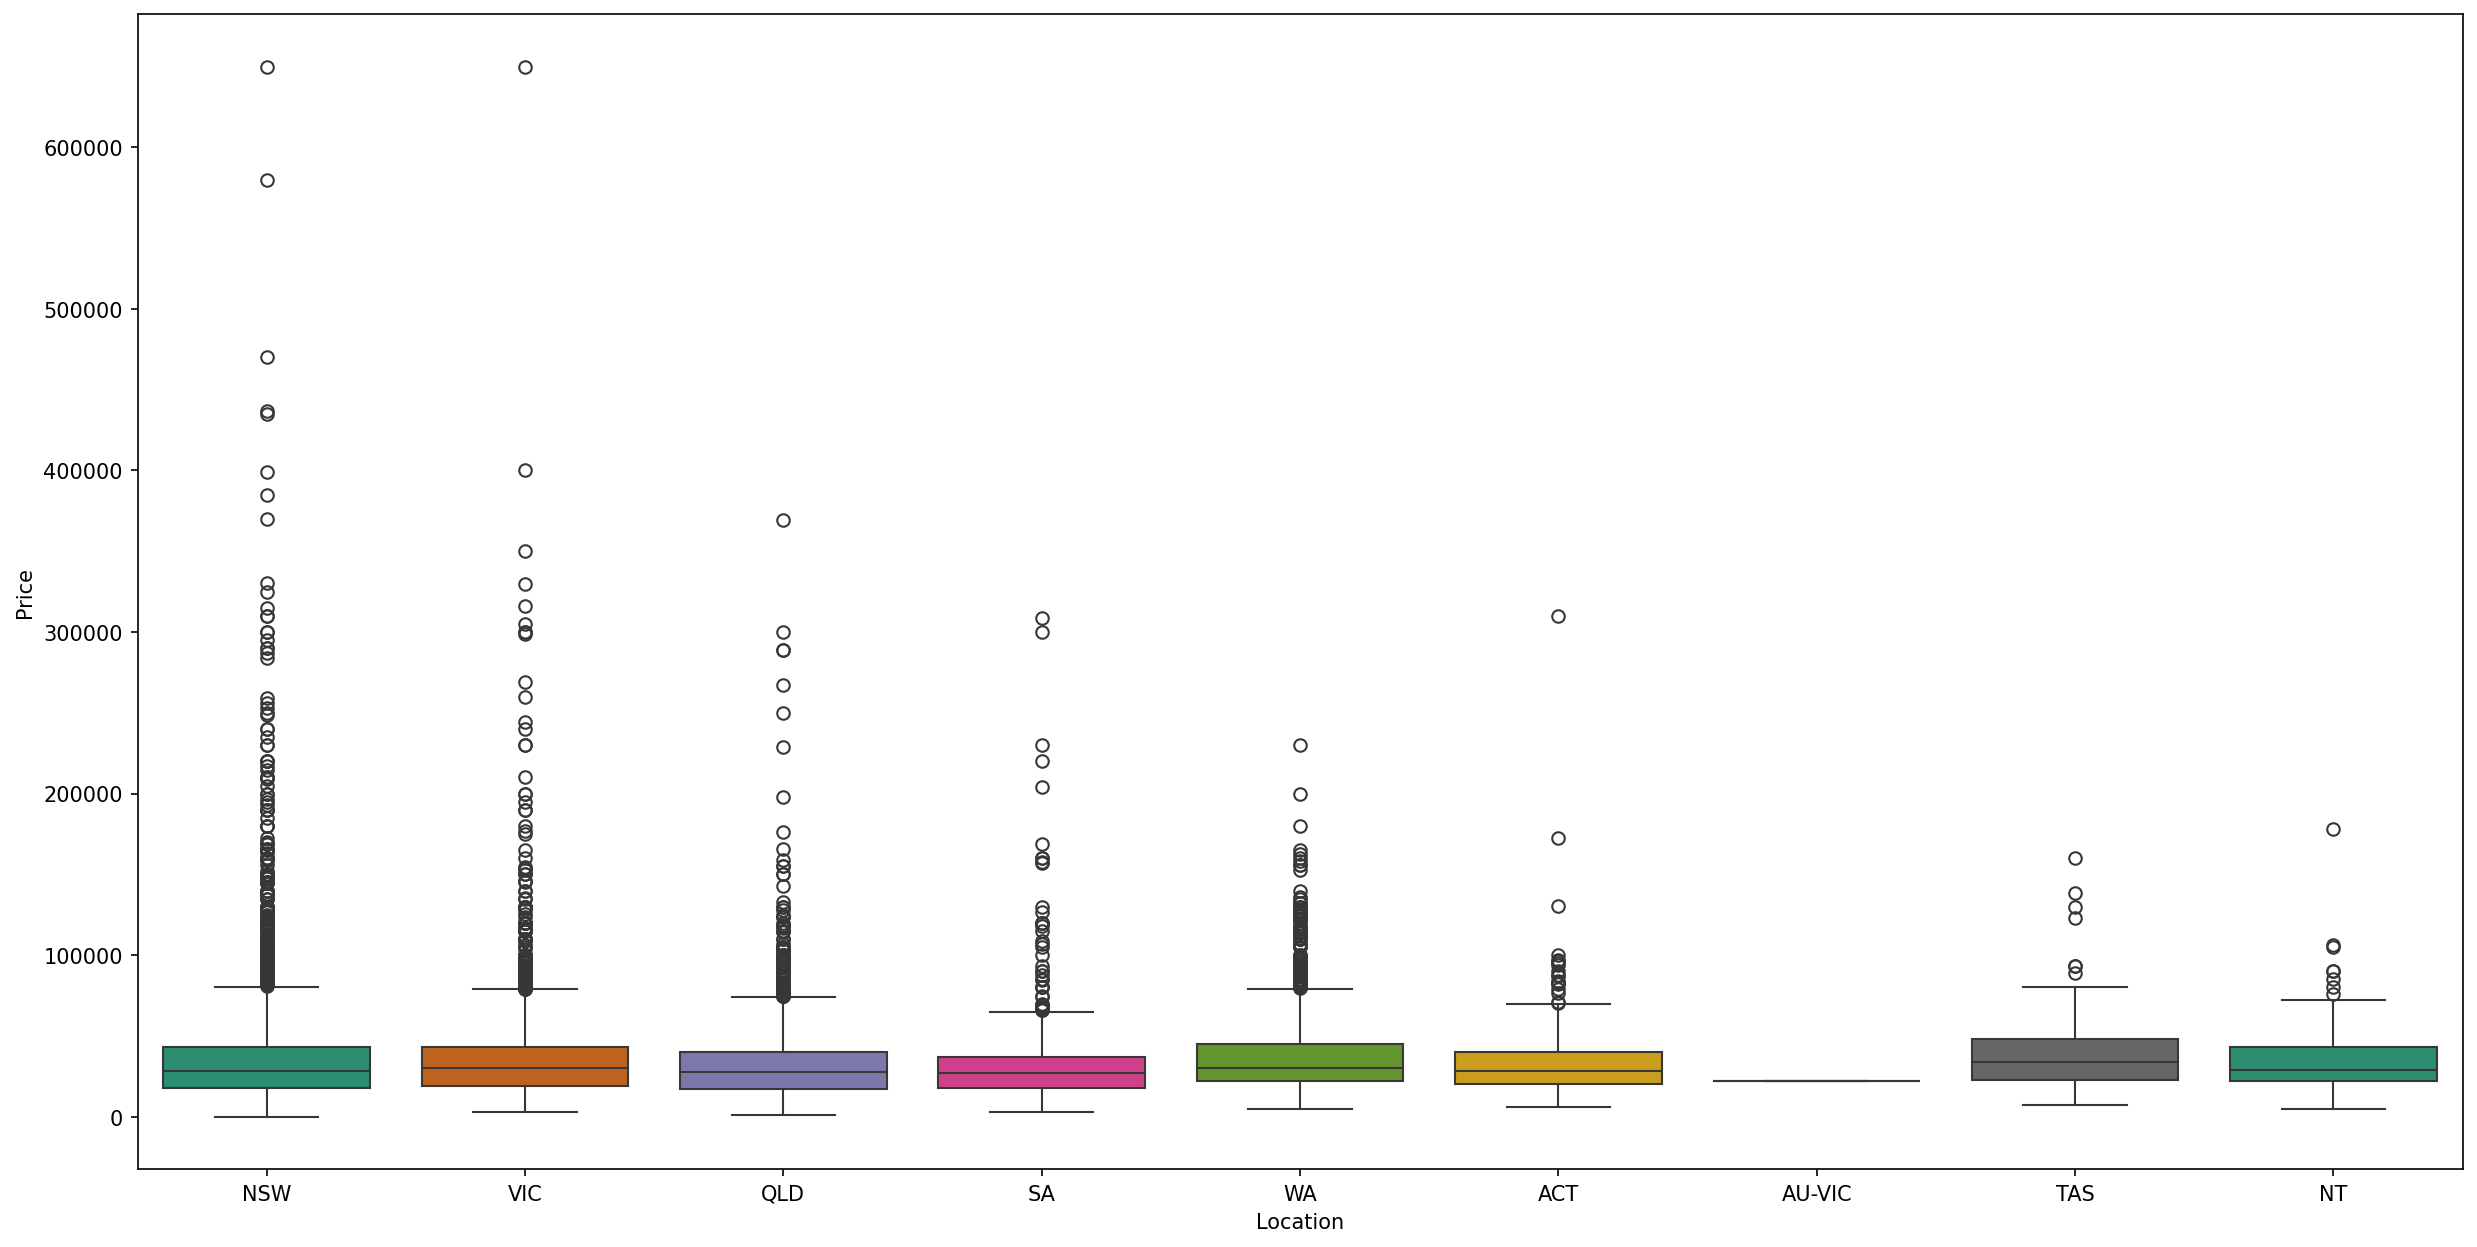

In [191]:
plt.figure(figsize=(20,10),dpi=150)
sns.boxplot(x=df['Location'],y=df['Price'],palette='Dark2')

The distribtion of prices in each loaction is highly positively skewed with many outliers.

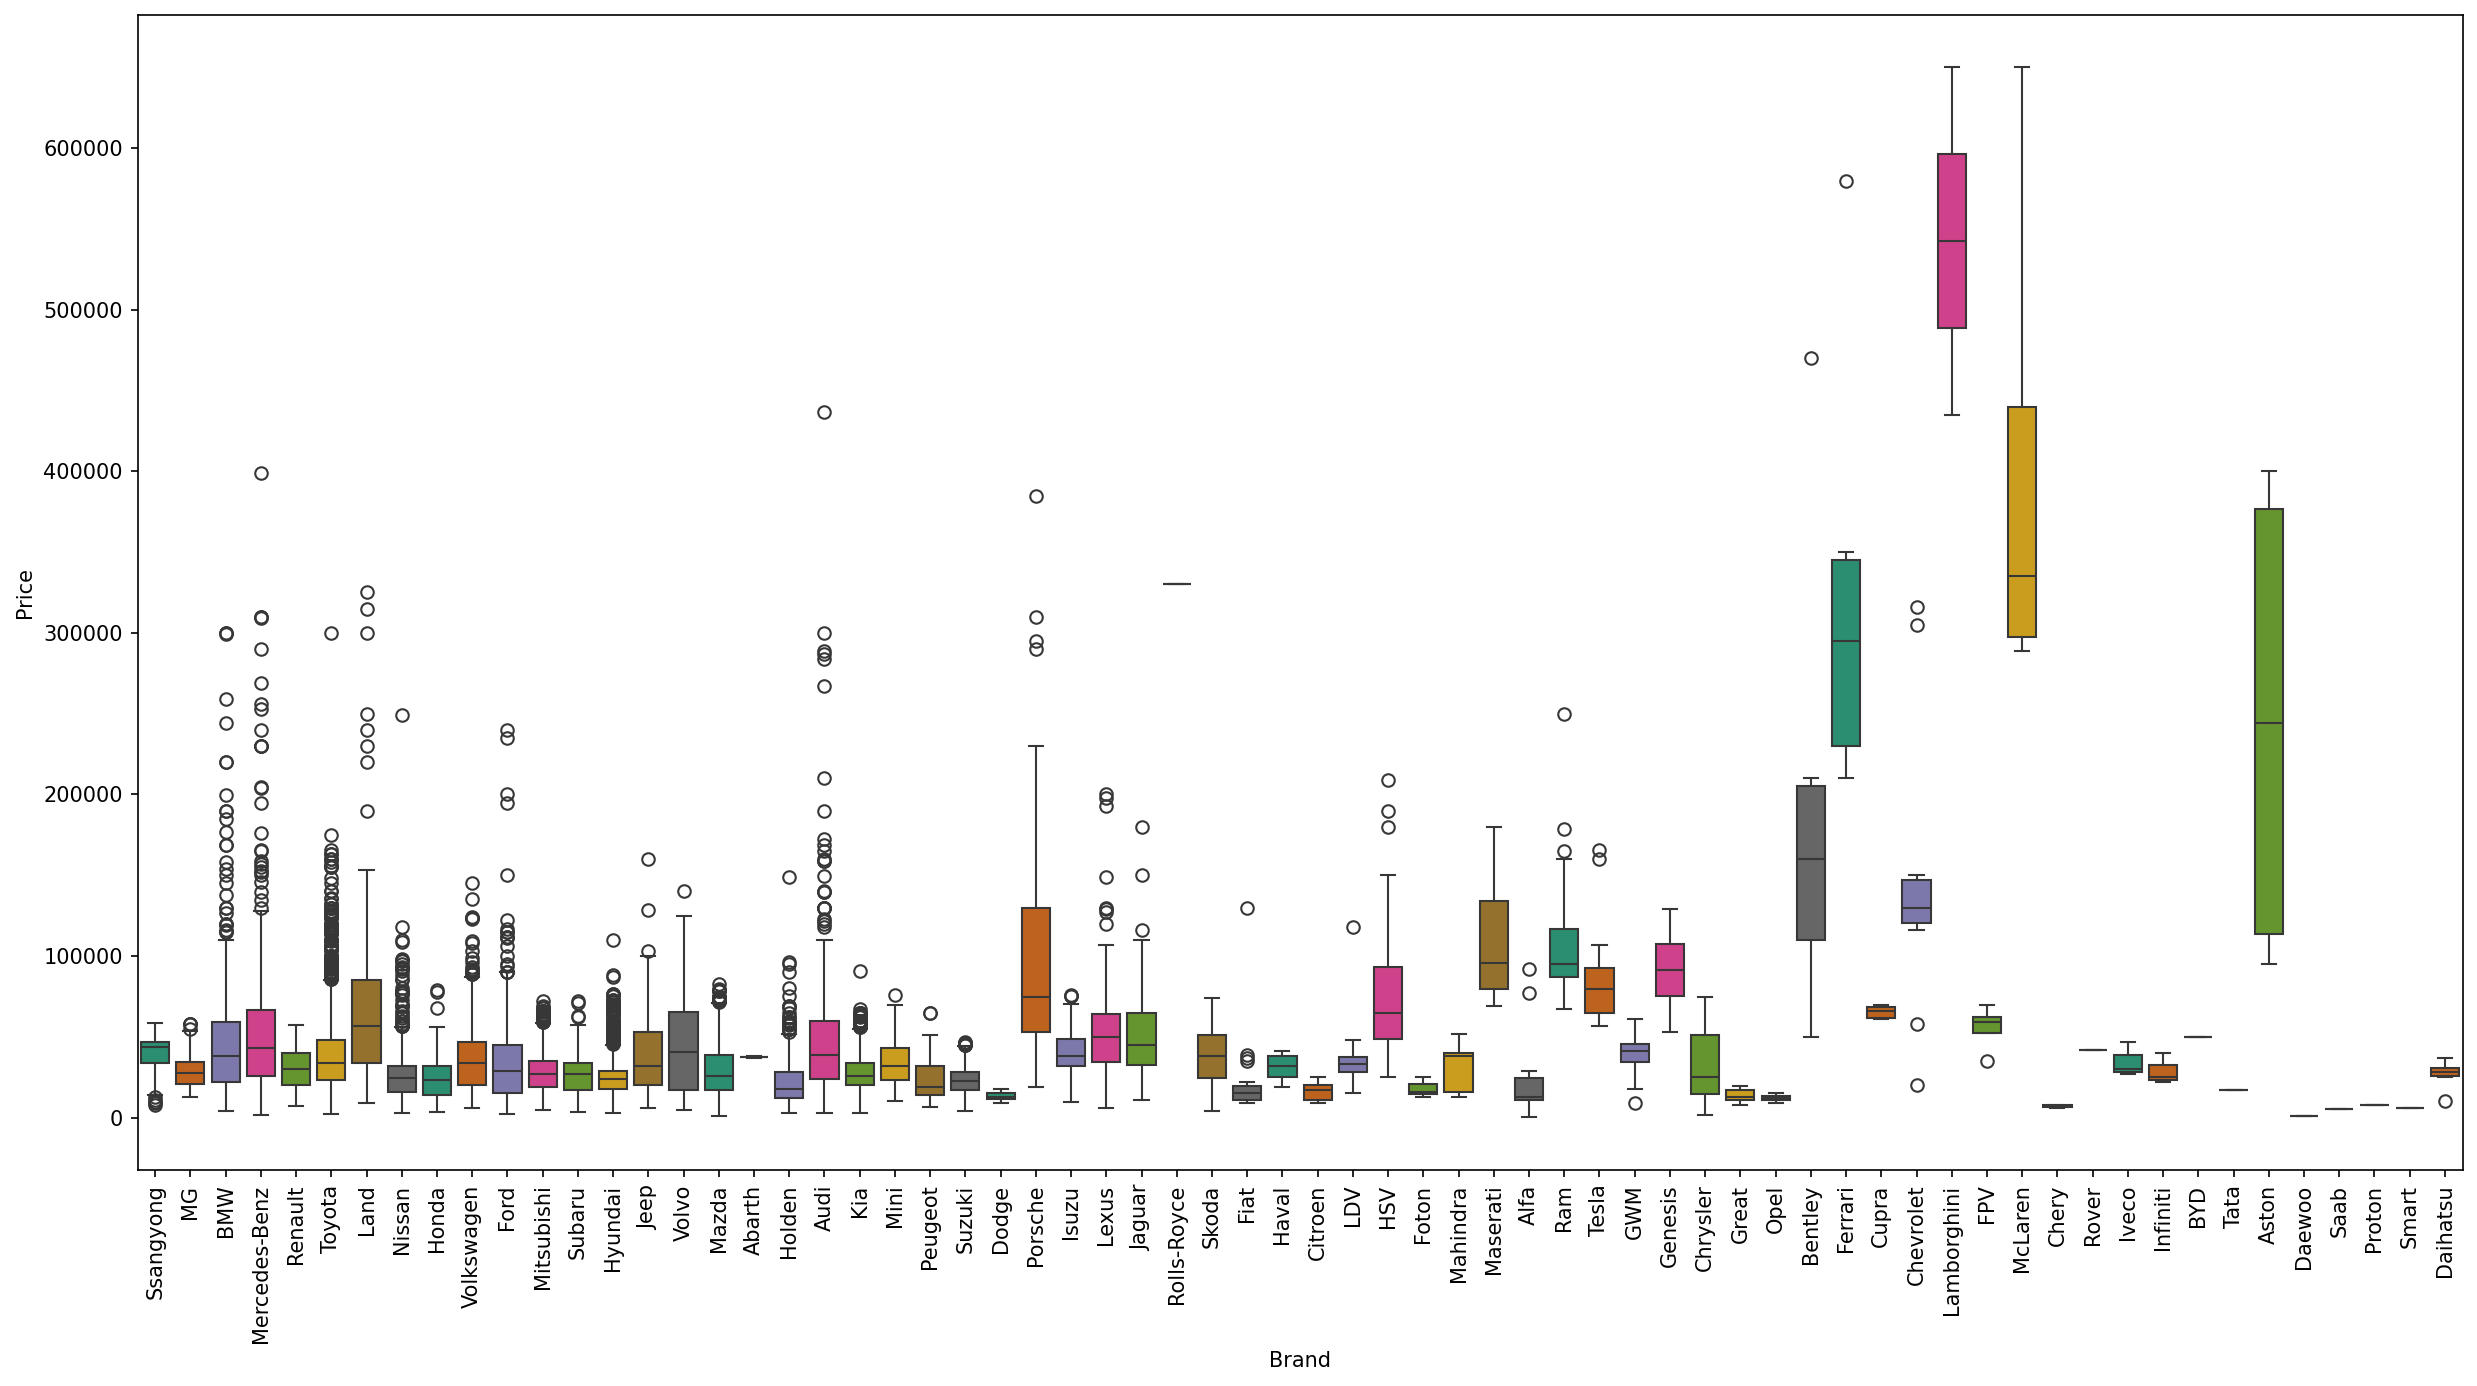

In [192]:
plt.figure(figsize=(20,10),dpi=150)
sns.boxplot(x=df['Brand'],y=df['Price'],palette='Dark2')
plt.xticks(rotation=90);

Lamborghini has the highest price range, followed by McLaren, Aston and Ferarri, while Nissan, Honda, Hyundai are some brands of affordable cars.

<Axes: >

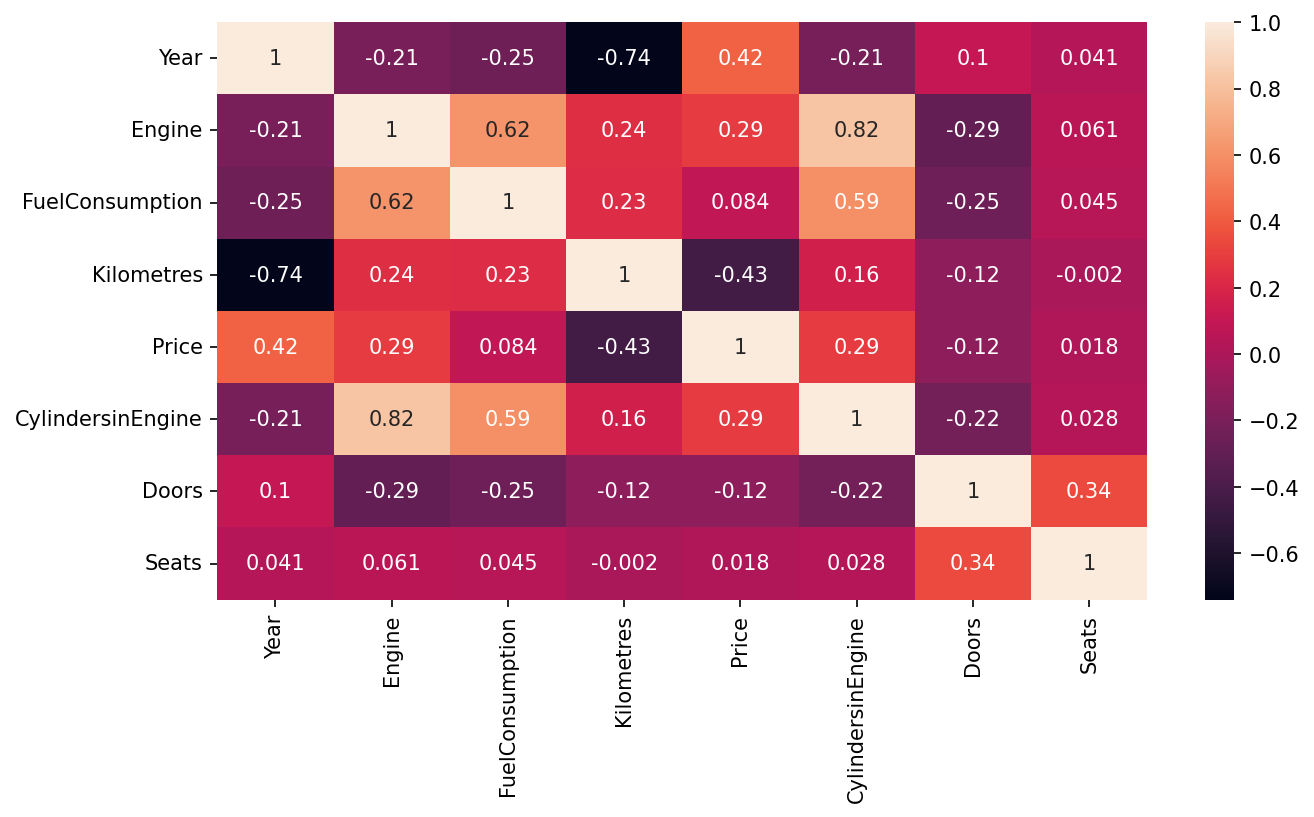

In [193]:
plt.figure(figsize=(10,5),dpi=150)
sns.heatmap(df[['Year','Engine','FuelConsumption','Kilometres','Price', 'CylindersinEngine','Doors','Seats']].corr(),annot = True)

**`Insights from the heatmap`**
- The manufactured Year has strong negative correlation (-0.74) with the Kilometres covered by the car. This is due to the fact that after 2000 a large number of cars were manufactured or released that which had a low price. This is also significant of the fact that cars were popularised after 2000, and a large number of people started owning them.
- The feature FuelConsumption has high positive correlation (0.62) with Engine. This is because the amount of fuel consumed depends on the capacity of the engine.
- The feature CylindersInEngine has high positive correlation (0.82) with Engine. This is because the capacity of the engine depends on the number of cylinders used.
- Price has some negative correlation with Kilometres covered (-0.4) and some positive correlation with year of manufacture (0.36). 

Now we try to see the distribution of the continuous variables that are present in our dataset

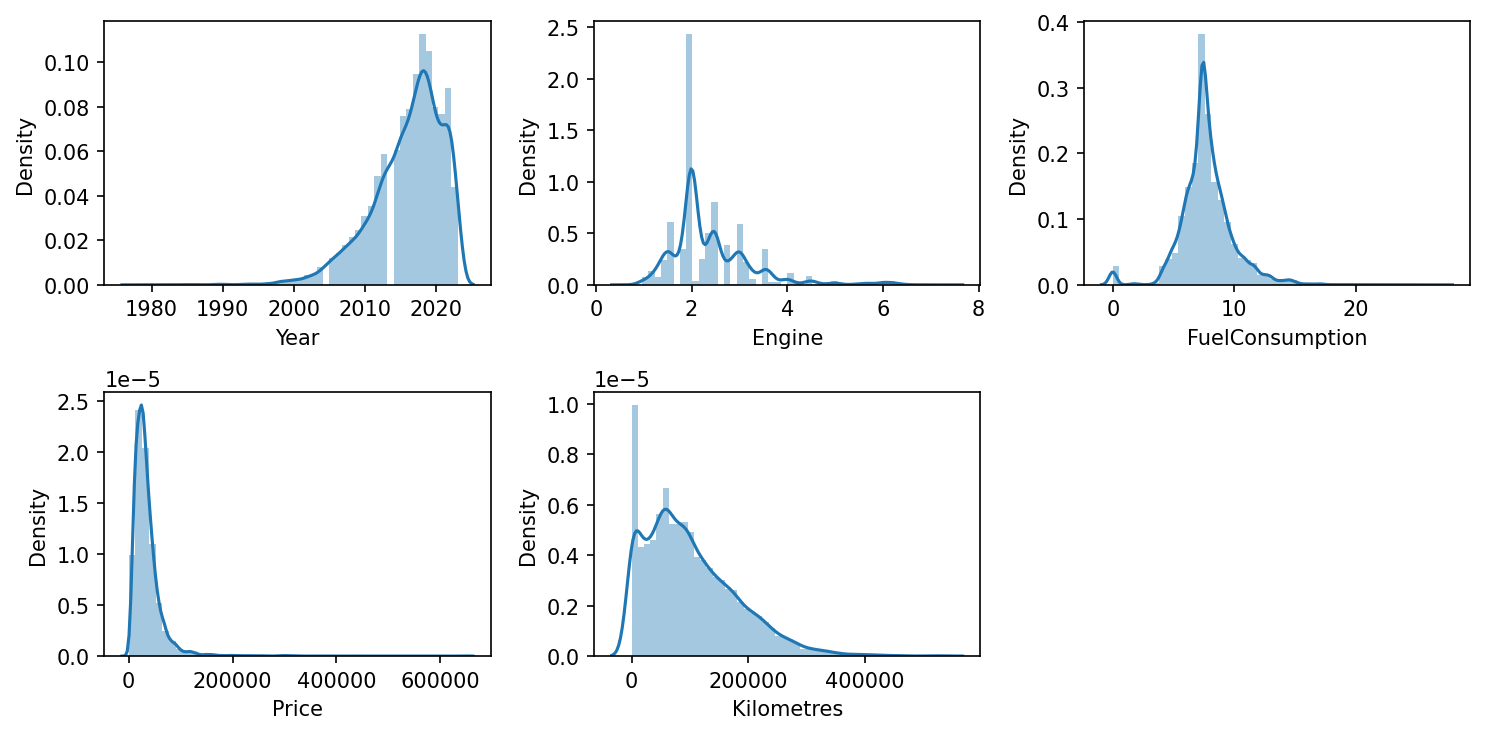

In [194]:
plt.figure(figsize=(10,5),dpi=150)

plt.subplot(2,3,1)
sns.distplot(df['Year'])

plt.subplot(2,3,2)
sns.distplot(df['Engine'])

plt.subplot(2,3,3)
sns.distplot(df['FuelConsumption'])

plt.subplot(2,3,4)
sns.distplot(df['Price'])

plt.subplot(2,3,5)
sns.distplot(df['Kilometres'])

plt.tight_layout()

Year has a high negative skewness while the other columns are positively skewed. To see the skewness of each column, we do the following steps.

In [195]:
df[['Year','Engine','FuelConsumption','Kilometres','Price']].skew()

Year              -1.075178
Engine             1.760236
FuelConsumption    0.217256
Kilometres         0.973705
Price              5.541073
dtype: float64

In order to see whether there are any outliers in these columns, we draw boxplots.

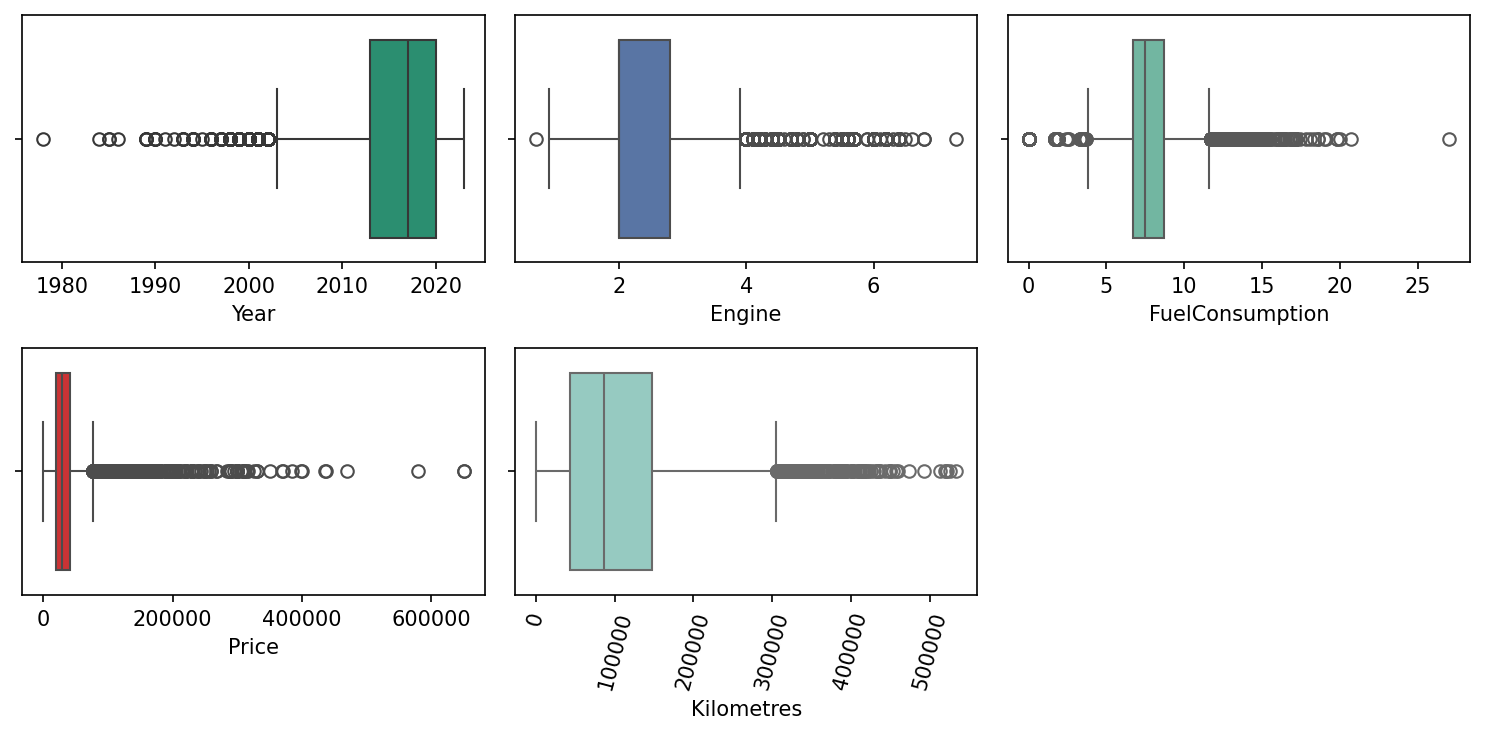

In [196]:
plt.figure(figsize=(10,5),dpi=150)

plt.subplot(2,3,1)
sns.boxplot(x='Year',data=df,palette='Dark2')

plt.subplot(2,3,2)
sns.boxplot(x='Engine',data=df,palette='deep')

plt.subplot(2,3,3)
sns.boxplot(x='FuelConsumption',data=df,palette='Set2')

plt.subplot(2,3,4)
sns.boxplot(x='Price',data=df,palette='Set1')

plt.subplot(2,3,5)
sns.boxplot(x='Kilometres',data=df,palette='Set3')
plt.xticks(rotation=75)

plt.tight_layout()

Now it's time to eliminate these outliers.

## Outlier Elimination using IQR method

In [197]:
#removing the outliers

def outlier(a):
    Q1 = a.quantile(0.25)
    Q3 = a.quantile(0.75)
    IQR = Q3-Q1
    L = Q1 - 1.5*IQR
    U = Q3 + 1.5*IQR
    return(L,U)

In [198]:
df = df.loc[df['Year'] >= outlier(df['Year'])[0]]
df = df.loc[df['Year'] <= outlier(df['Year'])[1]]

In [199]:
df = df.loc[df['Engine'] >= outlier(df['Engine'])[0]]
df = df.loc[df['Engine'] <= outlier(df['Engine'])[1]]

In [200]:
df = df.loc[df['FuelConsumption'] >= outlier(df['FuelConsumption'])[0]]
df = df.loc[df['FuelConsumption'] <= outlier(df['FuelConsumption'])[1]]

In [201]:
df = df.loc[df['Price'] >= outlier(df['Price'])[0]]
df = df.loc[df['Price'] <= outlier(df['Price'])[1]]

In [202]:
df = df.loc[df['Kilometres'] >= outlier(df['Kilometres'])[0]]
df = df.loc[df['Kilometres'] <= outlier(df['Kilometres'])[1]]

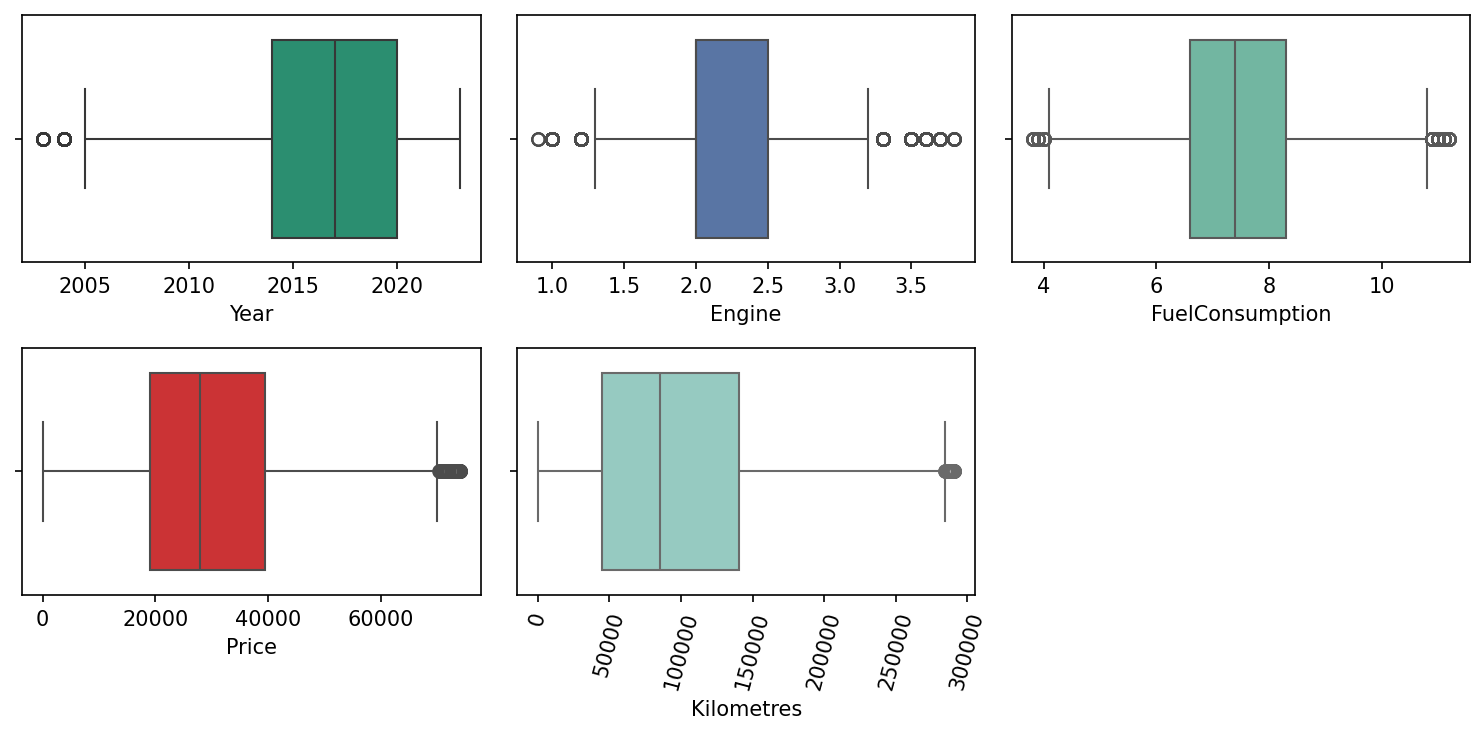

In [203]:
plt.figure(figsize=(10,5),dpi=150)

plt.subplot(2,3,1)
sns.boxplot(x='Year',data=df,palette='Dark2')

plt.subplot(2,3,2)
sns.boxplot(x='Engine',data=df,palette='deep')

plt.subplot(2,3,3)
sns.boxplot(x='FuelConsumption',data=df,palette='Set2')

plt.subplot(2,3,4)
sns.boxplot(x='Price',data=df,palette='Set1')

plt.subplot(2,3,5)
sns.boxplot(x='Kilometres',data=df,palette='Set3')
plt.xticks(rotation=75)

plt.tight_layout()

## Data Preparation

In [204]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [205]:
LE=LabelEncoder()
df['Brand']=LE.fit_transform(df['Brand'])

In [206]:
df_get_dummies=['UsedOrNew','Transmission','DriveType','FuelType','BodyType']
for col in df_get_dummies :
  onehotcoding=pd.get_dummies(df[col], prefix=col).astype(int)
  df = pd.concat([df, onehotcoding], axis=1)

In [207]:
df.drop(['UsedOrNew','Transmission','DriveType','FuelType','BodyType','FuelType','FuelType','Location'],axis=1,inplace=True)

In [208]:
scaler = StandardScaler()

In [209]:
y = df['Price']
x = df.drop(['Price'],axis=1)

In [210]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2 ,random_state=42)

In [211]:
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **`Model Building`**

## Linear Regression

In [214]:
from sklearn.linear_model import LinearRegression

In [215]:
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_scaled,y_train)

LinearRegression()

In [216]:
lr_preds= lr_model.predict(X_test_scaled)

## Decision Tree Regressor

In [217]:
from sklearn.tree import DecisionTreeRegressor

In [218]:
dt_model = DecisionTreeRegressor()

In [219]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [220]:
from sklearn.model_selection import GridSearchCV

In [221]:
gs_dt_model=GridSearchCV(dt_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [222]:
gs_dt_model.fit(X_train,y_train)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [223]:
gs_dt_model.best_params_

{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [224]:
dt_preds= gs_dt_model.predict(X_test)

## Random Forest Regressor

In [225]:
from sklearn.ensemble import RandomForestRegressor

In [226]:
rfc_model = RandomForestRegressor()

In [227]:
parameters={"n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]}

In [228]:
gs_rfc_model = GridSearchCV(rfc_model,param_grid=parameters,cv=3,verbose=3)

In [229]:
gs_rfc_model.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=30;, score=nan total time=   0.0s
[CV 3/3] E

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             verbose=3)

In [230]:
gs_rfc_model.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 30}

In [231]:
rfc_preds = gs_rfc_model.predict(X_test)

# **`Model Evaluation`**

In [235]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [242]:
lr = [r2_score(lr_preds,y_test),np.sqrt(mean_squared_error(lr_preds,y_test)),mean_absolute_error(lr_preds,y_test)]
dt = [r2_score(dt_preds,y_test),np.sqrt(mean_squared_error(dt_preds,y_test)),mean_absolute_error(dt_preds,y_test)]
rf = [r2_score(rfc_preds,y_test),np.sqrt(mean_squared_error(rfc_preds,y_test)),mean_absolute_error(rfc_preds,y_test)]

In [243]:
metric = pd.DataFrame([lr,dt,rf],columns=['R2 Score','Root Mean Squared Error','Mean Absolute Error'], index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor'])

In [244]:
metric

,R2 Score,Root Mean Squared Error,Mean Absolute Error
Linear Regression,0.610048,8004.160387,6050.010714
Decision Tree Regressor,0.746830,6894.290910,4949.569395
Random Forest Regressor,0.871932,4960.420168,3418.034404
